In [1]:
# Emma Jaud, Saumya Gupta, Ryan Clorfeine, Timothy Walker

# Starcraft
In this project we will be looking at a players actions to predict a players league using the Starcraft dataset

In [2]:
#starting imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time

In [3]:
%matplotlib inline

In [4]:
#reading in the data from csv
starcraft_data = pd.read_csv("Skillcraft_Dataset.csv")
starcraft_data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [5]:
# cleaning data
starcraft_data.replace('?', np.NaN, inplace=True)

print("Total num missing values:\n\n", starcraft_data.isnull().sum())

Total num missing values:

 GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64


In [6]:
# line-wise deletion with null entries
starcraft_data_clean = starcraft_data.dropna()
starcraft_data_clean = starcraft_data_clean.astype(float)

# max out total hours for unreasonably high values
maxTotalHours = 5000
starcraft_data_clean['TotalHours'] = starcraft_data_clean['TotalHours'].where(starcraft_data_clean['TotalHours'] <= maxTotalHours, maxTotalHours) 

# max out weekly hours for unreasonably high values
maxHoursPerWeek = 70
starcraft_data_clean['HoursPerWeek'] = starcraft_data_clean['HoursPerWeek'].where(starcraft_data_clean['HoursPerWeek'] <= maxHoursPerWeek, maxHoursPerWeek) 


### Why eliminate null and LeagueIndex 8
In eliminating the entries with null inputs(Age, HoursPerWeek and TotalHours played), we also eliminate the LeagueIndex 8 which is Professional leagues. This also allows us to predict an average persons LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, and GrandMaster since the average person is most likely not on a Professional League. 

### Why max out TotalHours and HoursPerWeek
Unlike most features which are programatically gathered, Age, HoursPerWeek and TotalHours appear to be self-reported data. As such, there are a few instances where these features take on unreasonable values (like 168 hours played per week, or 100000 total hours). We set a maximum value for these features such that the algorithms are not affected by these outliers. The max values of 5000 and 70 were chosen for TotalHours and HoursPerWeek respectively, as they were seen as the most reasonable upper-limit of usefulness.


In [7]:
#checking to see if data has no missing values
print("Total num missing values:\n\n", starcraft_data_clean.isnull().sum())

Total num missing values:

 GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64


## Separate the feature columns from the class label column
For this next part we are seperating our feature columns from our class label which is LeagueIndex

In [8]:
starcraft_data_Y = starcraft_data_clean['LeagueIndex']
starcraft_data_X = starcraft_data_clean.drop(['LeagueIndex', 'GameID'],axis=1)

min 16.0
max 44.0


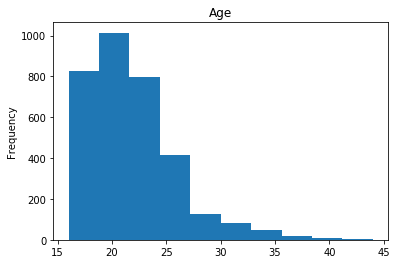

In [9]:
# DATA VISUALIZER
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

# select feature
sel = features[0]

column = starcraft_data_X[sel]
print("min", column.min())
print("max", column.max())
column.plot(kind='hist', title=sel)

## Neural Net

In [10]:
# INSTALL KERAS PACKAGE(S) IN ANACONDA > ENVIRONMENTS
from keras.backend import clear_session
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


### FORMATTING DATA
We divide the Y values by 7 to scale the ranks from 0 to 1. We then convert to a numpy array to match the input of the X values after they are scaled. We scale the X values using StandardScalar, as it produces the best results. This converts each X value into a Z-score for that value, and occurs in the baseline_model method through an sklearn Pipeline. This avoids data leakage by excluding test data in the scaling.

In [11]:
# less cumbersome
X_data, y_data = starcraft_data_X, starcraft_data_Y

In [12]:
# RUN ONLY ONCE!!!
y_data /= 7
y_data = y_data.values

In [13]:
print(X_data)
print()
print(y_data)
print()

print("X_data shape", X_data.shape, "\ny_data shape", y_data.shape)

       Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0     27.0          10.0      3000.0  143.7180         0.003515   
1     23.0          10.0      5000.0  129.2322         0.003304   
2     30.0          10.0       200.0   69.9612         0.001101   
3     19.0          20.0       400.0  107.6016         0.001034   
4     32.0          10.0       500.0  122.8908         0.001136   
...    ...           ...         ...       ...              ...   
3335  20.0           8.0       400.0  158.1390         0.013829   
3336  16.0          56.0      1500.0  186.1320         0.006951   
3337  21.0           8.0       100.0  121.6992         0.002956   
3338  20.0          28.0       400.0  134.2848         0.005424   
3339  22.0           6.0       400.0   88.8246         0.000844   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220            7.0        0.000110            0.000392   
1            0.000259            4.0       

### Defining a Keras model
We used the keras package to have more control over the structure and output of the learning model. Here is the architecture found to work best:
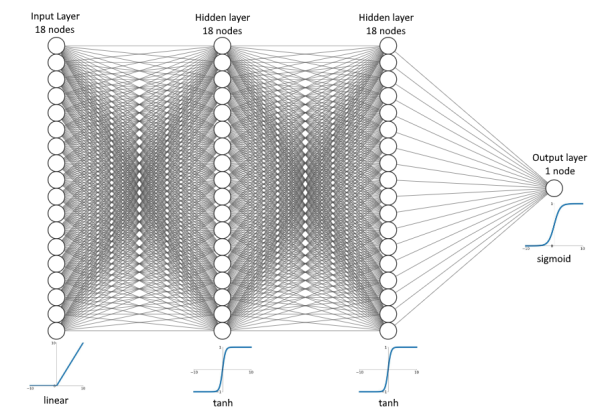
We experimented with the numbers of hidden layers (1, 2, 3), number of nodes per layer, activation functions (relu, tanh), having BatchNormalization and Dropout layers, and loss functions (Mean Squared Error, Mean Absolute Error). The prediction output is a number between 0 and 1, where 1 represents a rank of 7 while 0.1428 represents a rank of 1. We initialize the kernel according to a normal distribution to improve consistency between training runs.

Batch Normalization re-scales the inputs in between layers, while Dropout randomly chooses a proportion of nodes to deactivate in each training pass. In theory these methods help improve convergence, stability and mitigate overtraining, but in our case they weren't particularly helpful.

In [14]:
# define base model
def baseline_model(verbose=0):
    # create model
    model = Sequential()
    model.add(Dense(18, input_dim=18, kernel_initializer='normal', activation='tanh')) # hidden layer 1
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))

    model.add(Dense(18, kernel_initializer='normal', activation='tanh')) # hidden layer 2
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))

    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) # output layer
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    if verbose==1:
        print(model.summary())
    
    # Create a pipeline to scale the x values without data leakage
    steps = [('scaler', StandardScaler()), ('model', model)]
    pipeline = Pipeline(steps)

    return pipeline

In [15]:
# This method is used to evaluate our network.
def validate_network(m, X, Y, verbose=0):
    
    # convert decimal scores to predictions, subtract true values to obtain list of errors
    results = [x-7*y for x, y in zip([min(7, round(7*p[0])) for p in m.predict(X)], Y)]
    
    # array of error frequencies:
    # buckets[0] = (error = 0) correct prediction
    # buckets[1] = (error = +-1) one-off
    # buckets[2] = (error = +-2) two-off
    # buckets[3] = three-off or more
    buckets = [0]*4
    
    for r in results:
        if r==0:
            buckets[0] += 1
        elif abs(r)==1:
            buckets[1] += 1
        elif abs(r)==2:
            buckets[2] += 1
        else:
            buckets[3] += 1
            
    if verbose==1:
        for i in range(3):
            cumulative = 100*sum(buckets[:i+1])/sum(buckets)
            print('correct within',i,'ranks',cumulative,'percent of the time')
    else:
        return buckets


### Test the model
we test out the model, splitting the data into 70% train and 30% test. We find that 50 epochs is sufficient for inducing convergence. In other words, the model passes the training data into the model 50 times. The 'batch_size' or mini-batch size of 32 means that the model will backpropogate and update the weights every 32 records. This speeds up training and helps avoid local minima in convergence.

In [16]:
clear_session()
model = baseline_model(verbose=1)
model.fit(X_data, y_data, model__epochs=50, model__verbose=1, model__validation_split=0.30, model__batch_size=32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 19        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
None
Train on 2336 samples, validate on 1002 samples
Epoch 1/50
2336/2336 [==============================] - 0s 184us/step - loss: 0.0355 - val_loss: 0.0209
Epoch 2/50
2336/2336 [==============================] - 0s 41us/step - loss: 0.0187 - val_loss: 0.0184
Epoch 3/50
2336/2336 [==============================] - 0s 41us/step - loss: 0.0176 - val_loss: 0.0183
Epoch 4/50
2336/2336 [=

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 <keras.engine.sequential.Sequential object at 0x000001A9EEFCA888>)],
         verbose=False)

In [17]:
validate_network(model, X_data, y_data, verbose=1)

correct within 0 ranks 40.98262432594368 percent of the time
correct within 1 ranks 90.02396644697424 percent of the time
correct within 2 ranks 99.49071300179749 percent of the time


These results are promising, so we move forward with the model evaluation and training.

#### Wrapping the model
We wrap the keras model to look like an sklearn model so that we may use cross_val_score on it with our custom scoring criteria.

In [18]:
class KerasModel(BaseEstimator, ClassifierMixin):  
    
    # constructor
    def __init__(self):
        self.model = baseline_model()
    
    # train the model
    def fit(self, X, y=None):
        self.model.fit(X, y, model__epochs=50, model__verbose=0, model__batch_size=32)
        return self
    
    # make a prediction
    def predict(self, X):
        return(self.model.predict(X))
    
    # score the model
    def score(self, X, y):
        # 'score' function expects a number, but we want to know the quality of predictions (exactly right, one-off, etc)
        # so, we add our scores to a global container and return 0
        scores.append(validate_network(self.model, X, y))
        return(0) 

## Final evaluation
Now that we have designed our model and know that it works, it's time to evaluate it with a 5-fold cross-validation.

In [19]:
# clear any existing models from memory
clear_session()

# scores container will be populated by our custom 'scores' method in the wrapper
scores = []

# perform k-fold cross-validation
folds = 5
model = KerasModel()
cross_val_score(model, X_data, y_data, cv=folds)

array([0, 0, 0, 0, 0])

In [20]:
# aggregate scores into one final bucket
total = [0]*4
for score in scores:
    for i in range(4):
        total[i] += score[i]
        
# obtain cumulative results
for i in range(3):
    cumulative = 100*sum(total[:i+1])/sum(total)
    print('correct within',i,'ranks',cumulative,'percent of the time')

correct within 0 ranks 41.16237267825045 percent of the time
correct within 1 ranks 89.75434391851408 percent of the time
correct within 2 ranks 99.46075494307969 percent of the time


## Closing Thoughts
The model performs very well in the end. On a lucky run, the model can be as high as 43% accurate, with 92% accuracy within 1 rank. The final model would be trained on all the data as seen below. Training many networks, picking the luckiest runs and aggregating them into an ensemble could lead to an improved model by a few percentage points. However, due to the nature of the data and problem itself, we predict noise will strongly limit any model from classifying the records with exceptional accuracy. Players may be under or overranked (even intentionally so), and player skill fluctuates on a game-by-game basis. With that said, we are pleased with the performance of this model, and believe Blizzard would find it effective for placing new player accounts into the correct skill group, even after just one or two games.

In [21]:
clear_session()
final_model = baseline_model()
final_model.fit(X_data, y_data, model__epochs=100, model__verbose=0, model__batch_size=32)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 <keras.engine.sequential.Sequential object at 0x000001A9F347F688>)],
         verbose=False)